## US Accidents Exploratory Data Analysis


About EDA
Talking about the Dataset
   . Kaggle
   . information about accidents
   . Using useful tips to prevent accidents

In [3]:
# import the Library needed
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random

In [4]:
# getting the accident dataset
accident = pd.read_csv('data/US_Accidents.csv')

# information about the data and the columns

In [5]:
accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
len(accident)

2906610

In [7]:
accident.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
accident.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = accident.select_dtypes(include=numerics)

In [11]:
len(newdf.columns)

14

# Missing values and fixing 

In [12]:
accident.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [13]:
# let sort it to be more clearer
accident.isna().sum().sort_values()

ID                             0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Traffic_Signal                 0
State                          0
Bump                           0
County                         0
Side                           0
Street                         0
Turning_Loop                   0
Description                    0
Distance(mi)                   0
Start_Lng                      0
Start_Lat                      0
End_Time                       0
Start_Time                     0
Severity                       0
Amenity                        0
City                         108
Sunrise_Sunset               110
Civil_Twilight               110
Astronomical_Twilight        110
Nautical_T

In [14]:
# let us find the missing percentages
missing_accid_percetages = accident.isna().sum().sort_values(ascending=True) / len(accident)
missing_accid_percetages

ID                       0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Traffic_Signal           0.000000
State                    0.000000
Bump                     0.000000
County                   0.000000
Side                     0.000000
Street                   0.000000
Turning_Loop             0.000000
Description              0.000000
Distance(mi)             0.000000
Start_Lng                0.000000
Start_Lat                0.000000
End_Time                 0.000000
Start_Time               0.000000
Severity                 0.000000
Amenity                  0.000000
City                     0.000037
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Astronomical_T

In [15]:
missing_accid_percetagesNew = missing_accid_percetages[missing_accid_percetages !=0]

<AxesSubplot:>

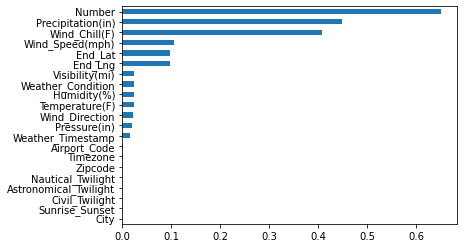

In [16]:
missing_accid_percetagesNew.plot(kind='barh')

# Exploratory Analysis and Visualization

In [17]:
accident.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
# fews columns to analysis
# City
# County
# Weather
# start Lat, Start Lng
# Temperature
# Junction

# City

In [19]:
cities = accident.City.unique()
cities

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [20]:
len(cities), cities[0:50]

(11790,
 array(['Greenville', 'Charlotte', 'Los Gatos', 'Carson City',
        'Fort Lauderdale', 'Rifle', 'Whittier', 'Franklin', 'Valencia',
        'Dover', 'Yonkers', 'Garland', 'Tucson', 'Oakland', 'Houston',
        'Los Angeles', 'Fontana', 'Saint Clair Shores',
        'Hopewell Junction', 'Atlanta', 'Fuquay Varina', 'Daleville',
        'Martinez', 'North Charleston', 'Austin', 'Seal Beach',
        'Cedar Springs', 'Miami', 'Corfu', 'Indianapolis', 'Baton Rouge',
        'Grand Terrace', 'Providence Forge', 'Tempe', 'Pittsford',
        'Pittsburgh', 'Sacramento', 'Latham', 'Homosassa', 'Fort Worth',
        'Redding', 'Downey', 'Minneapolis', 'Lake Worth', 'Grand Rapids',
        'Aldrich', 'Richmond', 'North Highlands', 'Dublin', 'Stafford'],
       dtype=object))

In [21]:
# Cities by accidents
cities_by_accidents = accident.City.value_counts()
cities_by_accidents[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [22]:
# I notice that New York is not among the accident by Cities and i tried to even find out if 
# New York records are included in the dataset

'NY' in accident.State, accident["City"]=='New York'

(False,
 0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 2906605    False
 2906606    False
 2906607    False
 2906608    False
 2906609    False
 Name: City, Length: 2906610, dtype: bool)

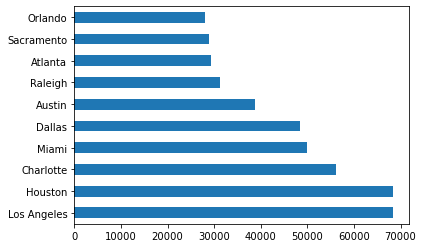

In [23]:
cities_by_accidents[:10].plot(kind='barh');

In [24]:
import seaborn as sns
sns.set_style("darkgrid")

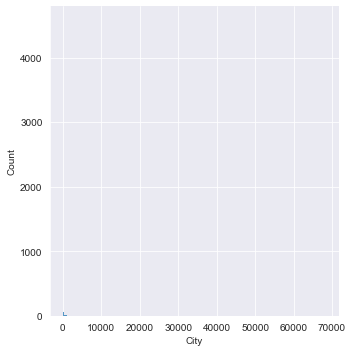

In [25]:
sns.displot(cities_by_accidents);

In [26]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents <= 1000]

In [27]:
len(high_accident_cities) / len(cities)

0.04351145038167939

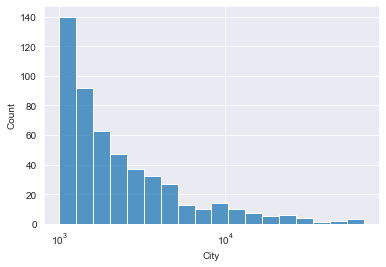

In [28]:
sns.histplot(high_accident_cities, log_scale=True);

In [29]:
len(low_accident_cities) / len(cities)


0.9564037319762511

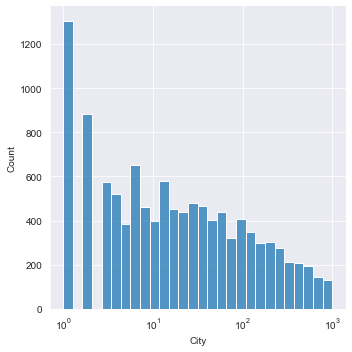

In [30]:
sns.displot(low_accident_cities, log_scale=True);

In [31]:
cities_by_accidents[cities_by_accidents == 1]

Falls                        1
Crump                        1
La Habra Heights             1
South Brunswick              1
Coleharbor                   1
                            ..
Garden Plain                 1
Village Of Indian Springs    1
Bretton Woods                1
Dewey Beach                  1
Whitney                      1
Name: City, Length: 1306, dtype: int64

# States

In [32]:
states = accident.State.unique()
states

array(['SC', 'NC', 'CA', 'NV', 'FL', 'CO', 'TN', 'NY', 'TX', 'AZ', 'NJ',
       'MI', 'GA', 'VA', 'IN', 'LA', 'PA', 'MN', 'OH', 'MD', 'CT', 'IL',
       'MO', 'OR', 'NE', 'OK', 'UT', 'WA', 'AL', 'WI', 'MA', 'DC', 'MS',
       'KS', 'KY', 'ME', 'IA', 'WV', 'AR', 'ID', 'RI', 'WY', 'NM', 'MT',
       'NH', 'DE', 'ND', 'SD', 'VT'], dtype=object)

In [33]:
# States by accidents
states_by_accidents = accident.State.value_counts()
states_by_accidents[:20]

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
Name: State, dtype: int64

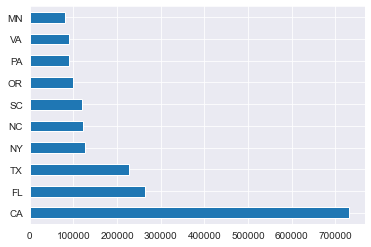

In [34]:
states_by_accidents[:10].plot(kind='barh');

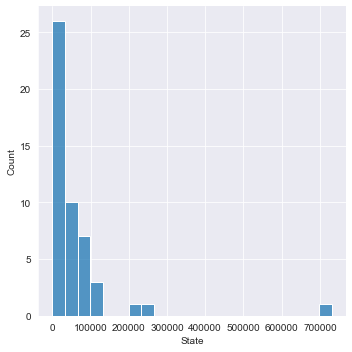

In [35]:
sns.displot(states_by_accidents);

In [36]:
high_accident_states = states_by_accidents[states_by_accidents >= 1000]
low_accident_states = states_by_accidents[states_by_accidents <= 1000]

In [37]:
len(high_accident_states) / len(states)

0.9183673469387755

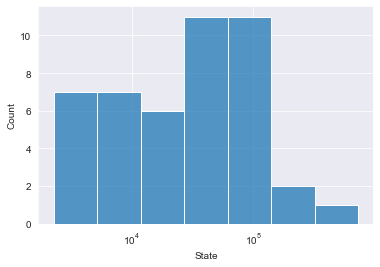

In [38]:
sns.histplot(high_accident_states, log_scale=True);

In [39]:
len(low_accident_states) / len(states)

0.08163265306122448

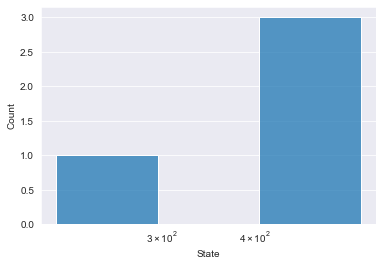

In [40]:
sns.histplot(low_accident_states, log_scale=True);

### Start-time

In [41]:
accident.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [44]:
# The start time is in String
# so l have to covert it to date

accident.Start_Time = pd.to_datetime(accident.Start_Time)
accident.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [45]:
# i need the hour(s) of each timestamp
accident.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

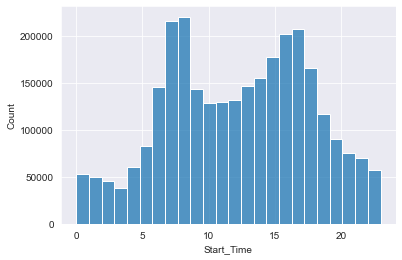

In [49]:
# ploting the starttime hour
sns.histplot(accident.Start_Time.dt.hour, bins=24);

C:\Users\djima\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


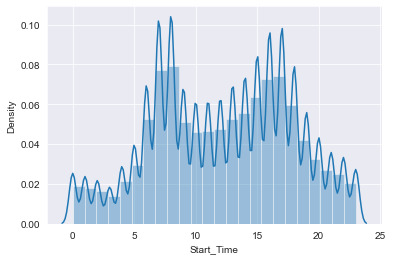

In [52]:
sns.distplot(accident.Start_Time.dt.hour, bins=24);

C:\Users\djima\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


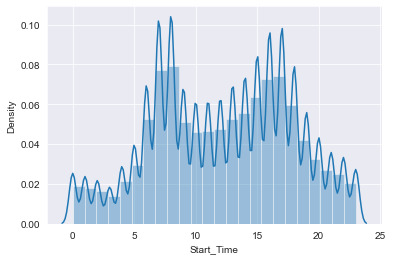

In [56]:
sns.distplot(accident.Start_Time.dt.hour, bins=24, norm_hist=True);

In [60]:
accident.Start_Time.dt.dayofweek

0          1
1          0
2          6
3          1
4          2
          ..
2906605    3
2906606    3
2906607    0
2906608    6
2906609    0
Name: Start_Time, Length: 2906610, dtype: int64

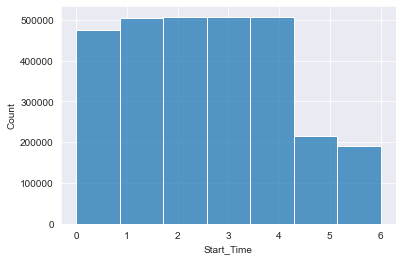

In [62]:
sns.histplot(accident.Start_Time.dt.dayofweek, bins=7);

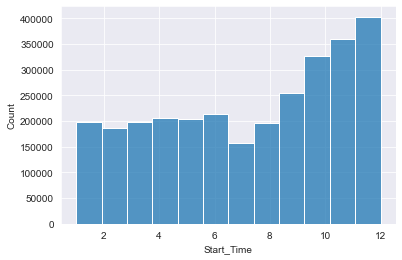

In [65]:
sns.histplot(accident.Start_Time.dt.month, bins=12);

# Summary and Conclusions

In [ ]:
Insights:
-  
- Less than 5% cities has accidents above 1000
- 95% of the cities has accidents below 1000
- from the graph above and exploration it shows that in 1306 Cities only reported one accident which sinces odd and needs to be investigated
- Most of the accident happens between 5 - 10 and the obvious reason is the people are in a rust to work, schools and their businesses
- after the time started above the accident rate goes down, until 15 - 18 hours when people are going back home from work, school and businesses
- Accident occurs more during the week days and is less during weekends when people dont mostly go out.
- More Accidents occurs during the 10 -12 month and i think that is the time that people are trying to bring different activities to a close, in a way they try to do many things at the same time
